# Scrape Free Proxies with Selenium
In this tutorial, you'll learn how to scrape a list of free proxies that you can use for web scraping. One of the most reliable sources of free proxies is at [spys.one](https://spys.one/en/anonymous-proxy-list/).

![spys-proxy-list-1.png](../../assets/img/spys-proxy-list-1.png)

The proxy information is partially rendered in JavaScript, so it's best to utilize a Selenium headless browser to scrape this data. First, we'll import the required libraries for Selenium, as well as time, Pandas, Fake UserAgent, and Undetected ChromeDriver. Time is already included with Python, but case you don't have any of the other libraries, you can install them using the following commands:

`pip install -U selenium`

`pip install pandas`

`pip install fake-useragent`

`pip install undetected-chromedriver`

In [9]:
import time
import pandas as pd
import undetected_chromedriver.v2 as uc
from fake_useragent import UserAgent
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Let's create a function to instantiate a WebDriver instance. We will use Undetected ChromeDriver for this instance, which you can get from [here](https://github.com/ultrafunkamsterdam/undetected-chromedriver). Undetected ChromeDriver is a special ChromeDriver that helps to evade detection while scraping dynamic websites. The basic usage is essentially the same as regular ChromeDriver.

In [4]:
def browser():
    # Get random user agent
    ua = UserAgent()
    user_agent = ua.random
    # Set options for undetected chromedriver
    options = uc.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument(f"user-agent={user_agent}")
    # Instantiate driver with options
    driver = uc.Chrome(options=options, use_subprocess=True)
    return driver

Next, we will define our main scraper function. We'll start by instantiating our WebDriver instance using the method we created above. Then, we will use Selenium's `get()` method to retrieve the URL with our WebDriver instance. Since the page takes a few seconds to load, we'll make the program sleep for 3 seconds.

In [ ]:
def scrape_proxies():
    url = "https://spys.one/en/anonymous-proxy-list/"

    # Instantiate the driver
    driver = browser()
    driver.get(url)
    time.sleep(3)
    
    # ...

There are two dropdown menus that we need to select an option from: the first is "Show" and the second is "Type." We want to show the maximum possible number of proxies, which is 500.

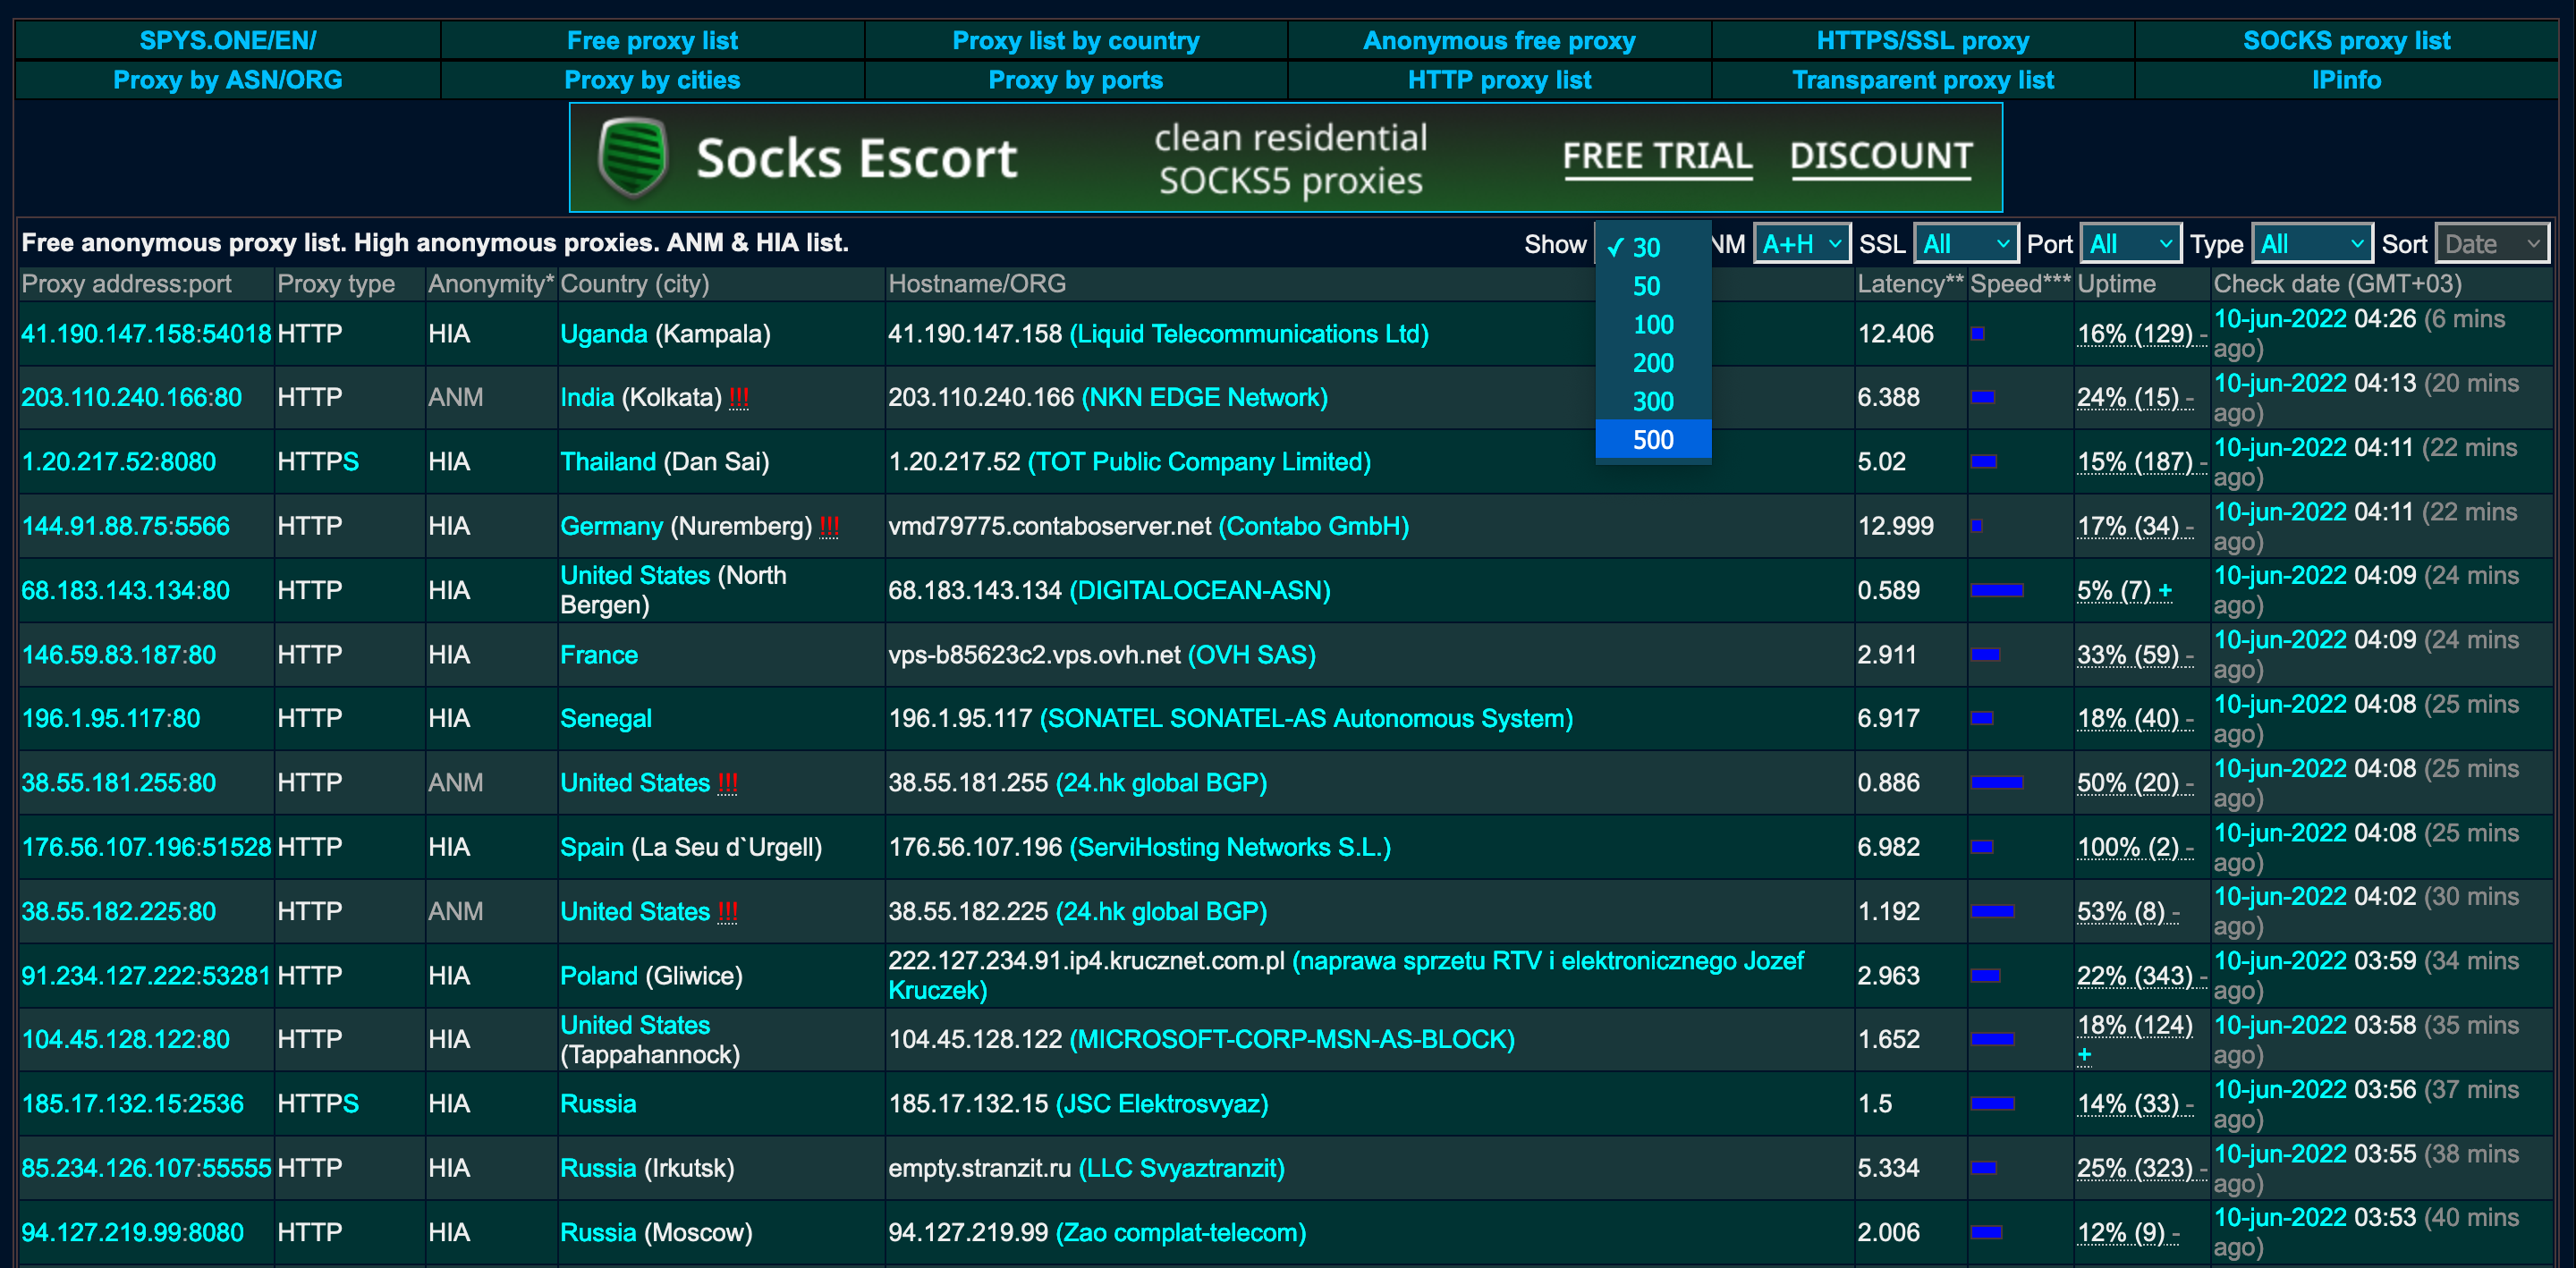

Let's inspect the element to see exactly what we need to scrape. The first dropdown menu is represented by a `<select>` tag with an `id` attribute of `xpp`.

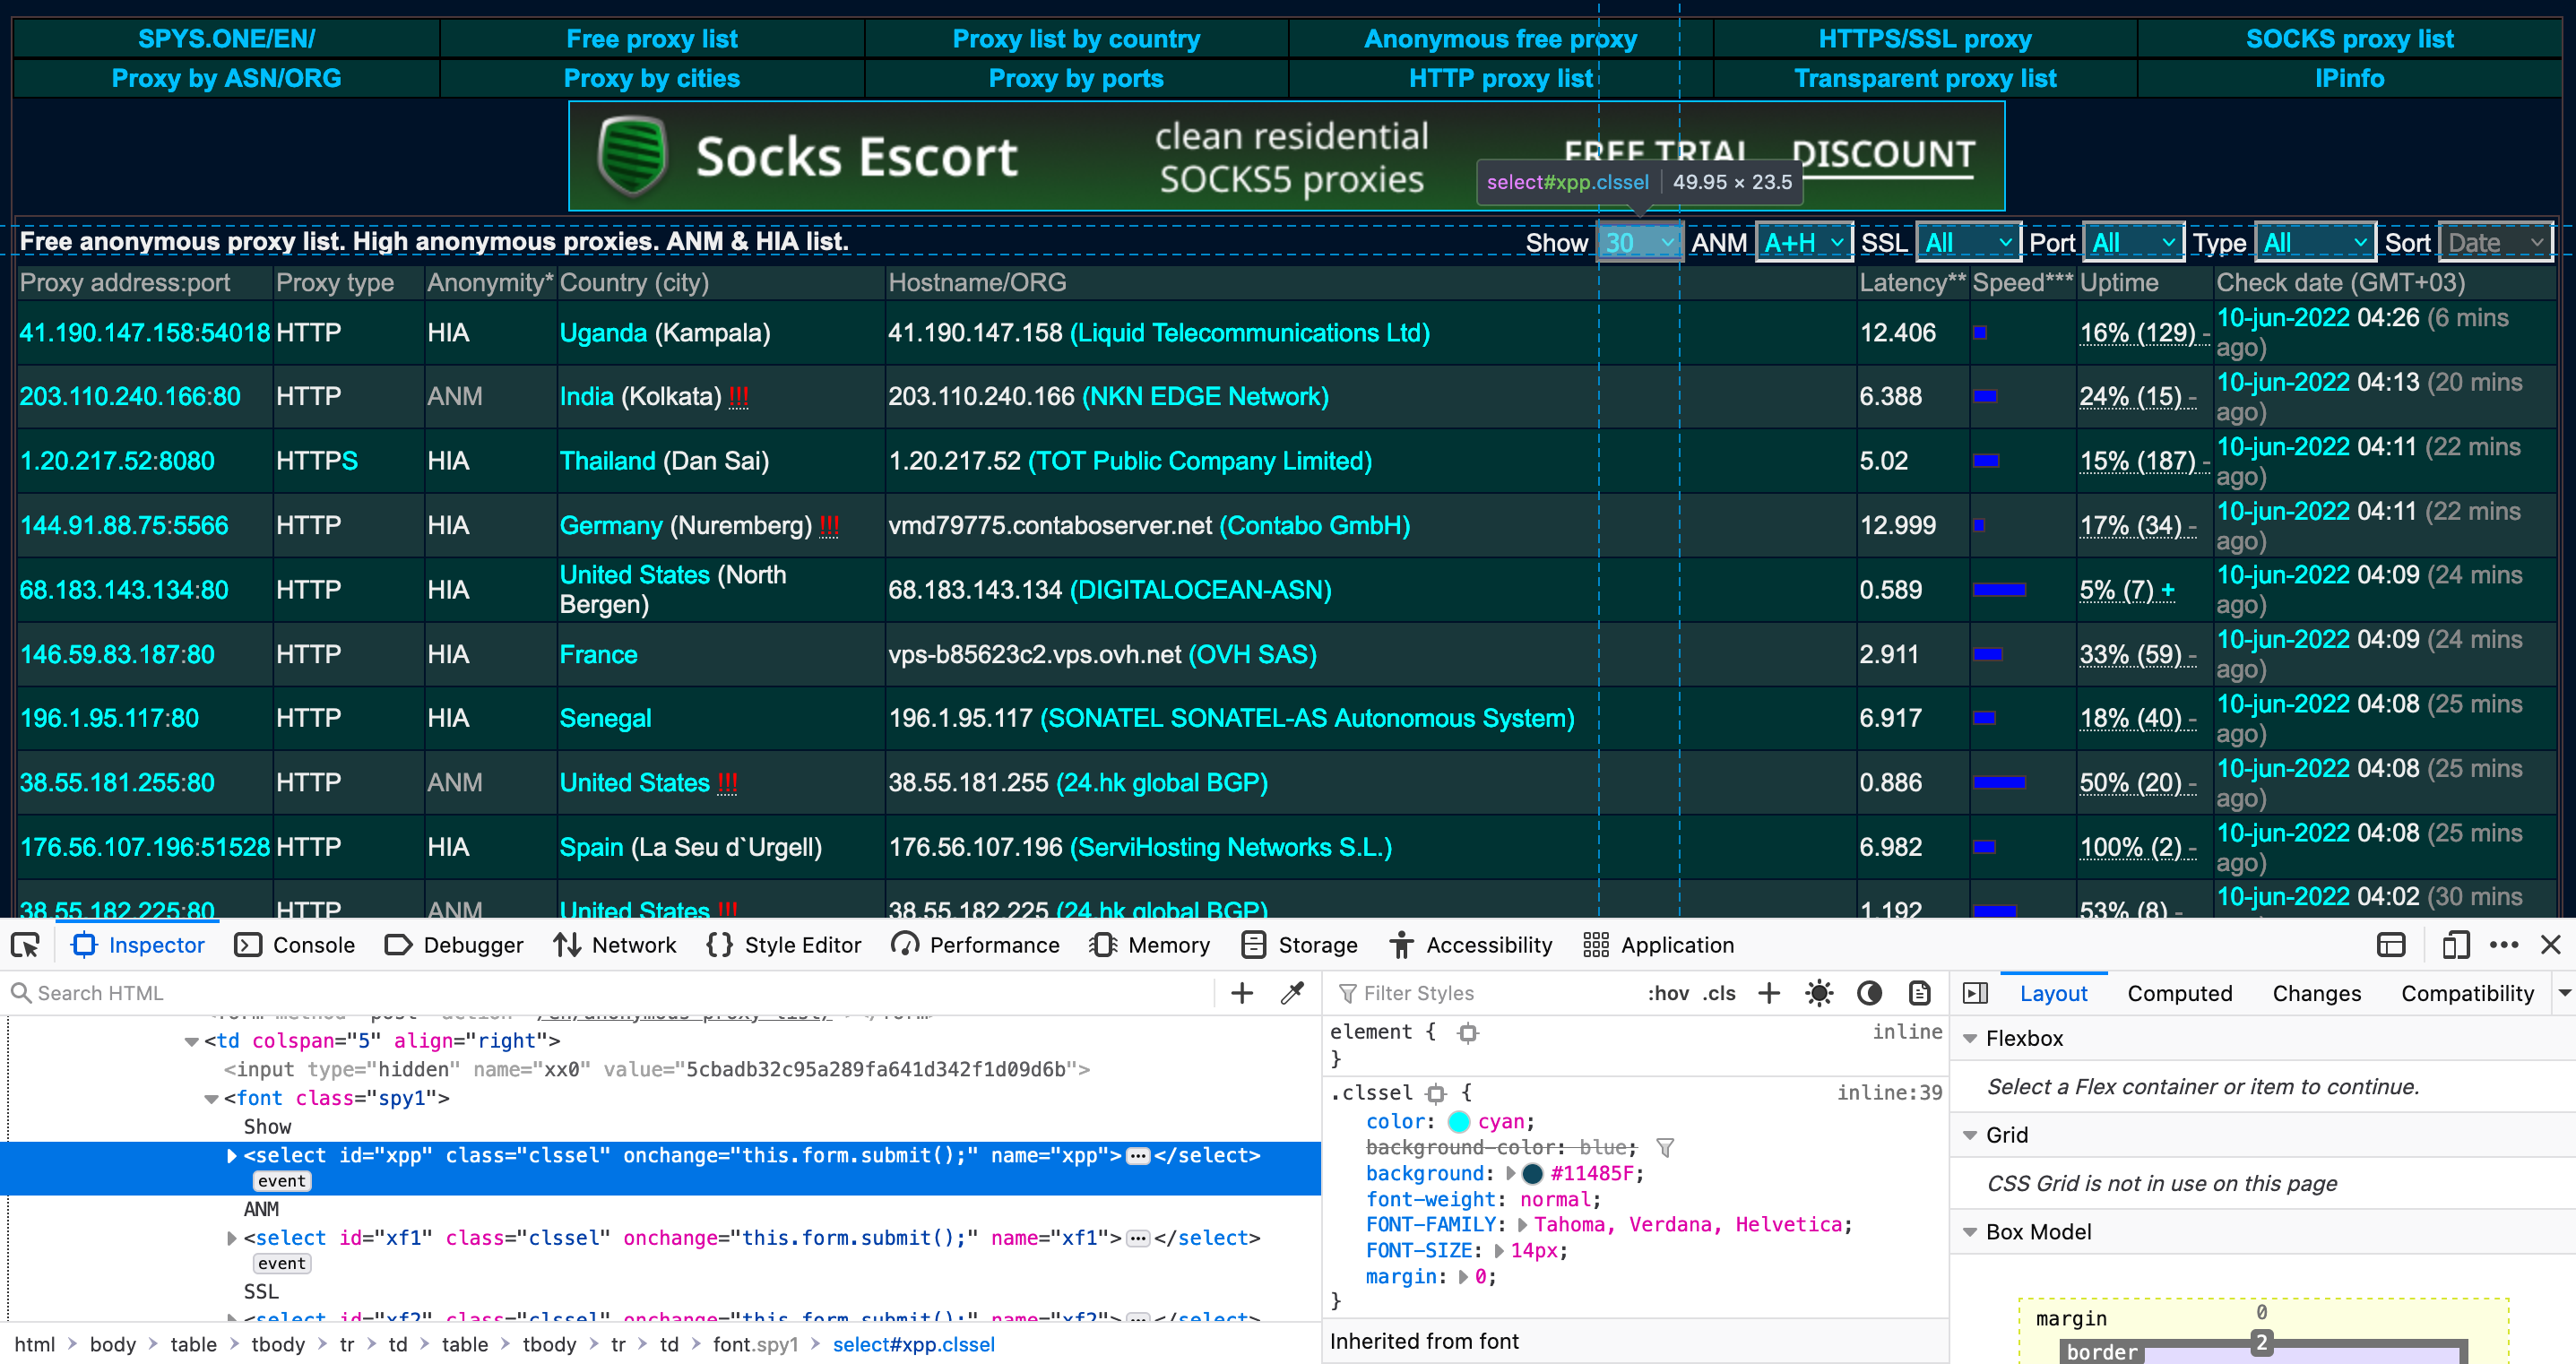

The type of proxies we want is HTTP, so we'll select that from the other dropdown menu.

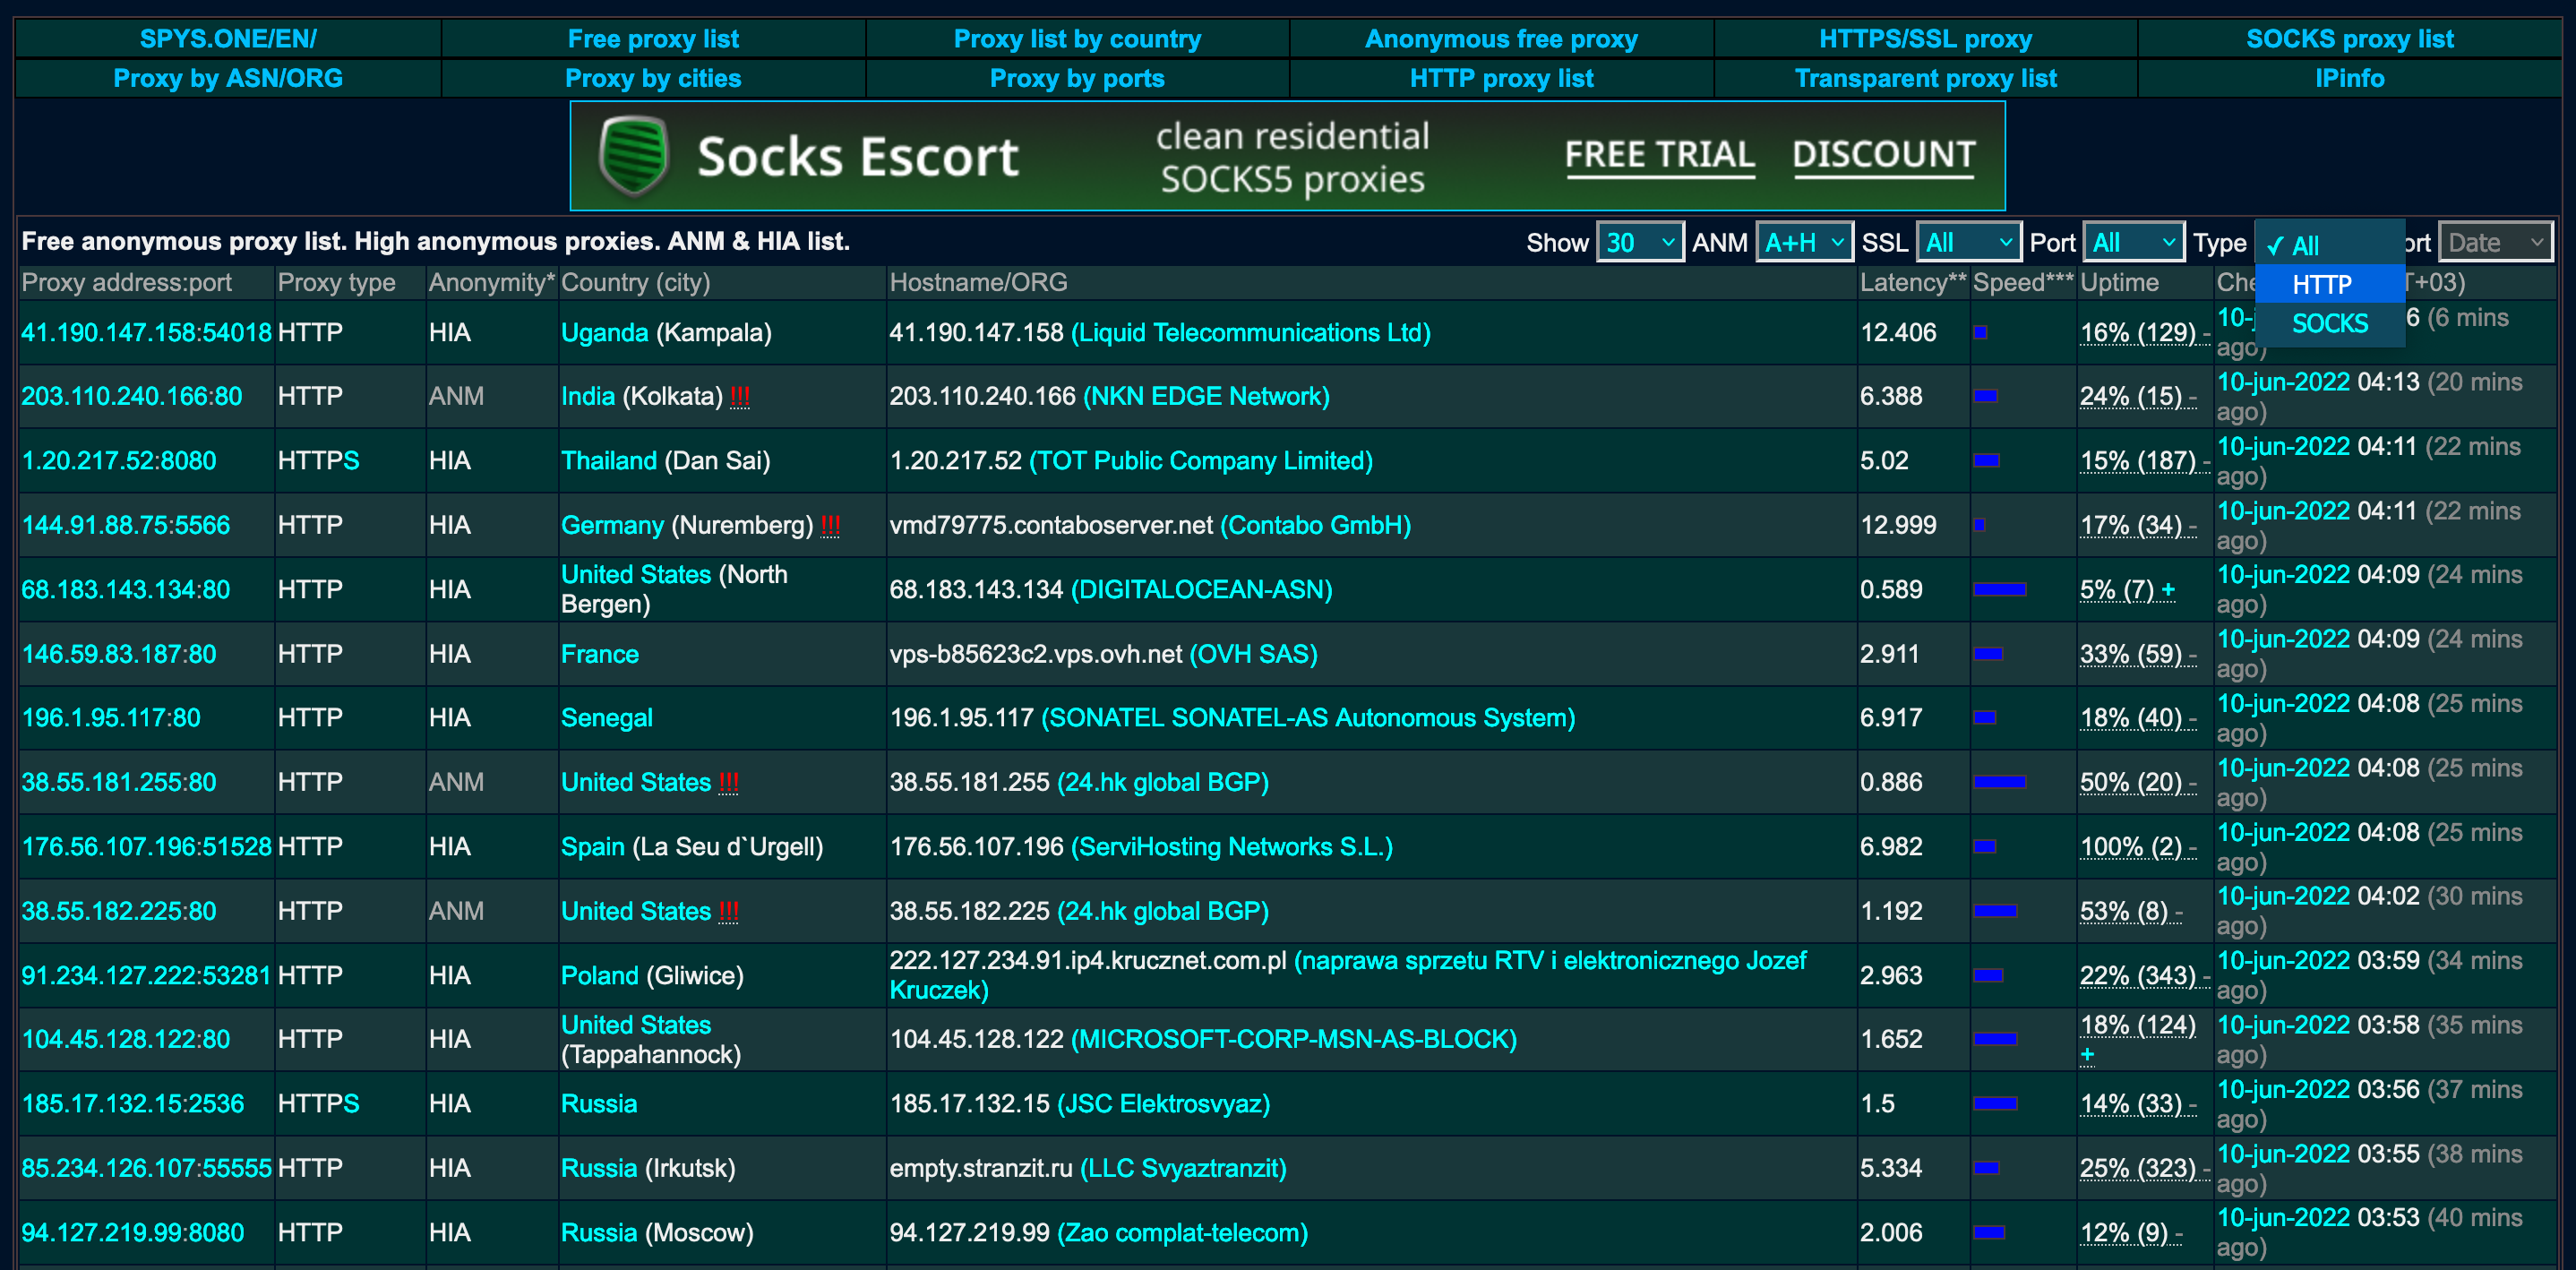

Inspecting the other dropdown element, we can see that it is represented by a `<select>` tag with `id` attribute of `xf5`.

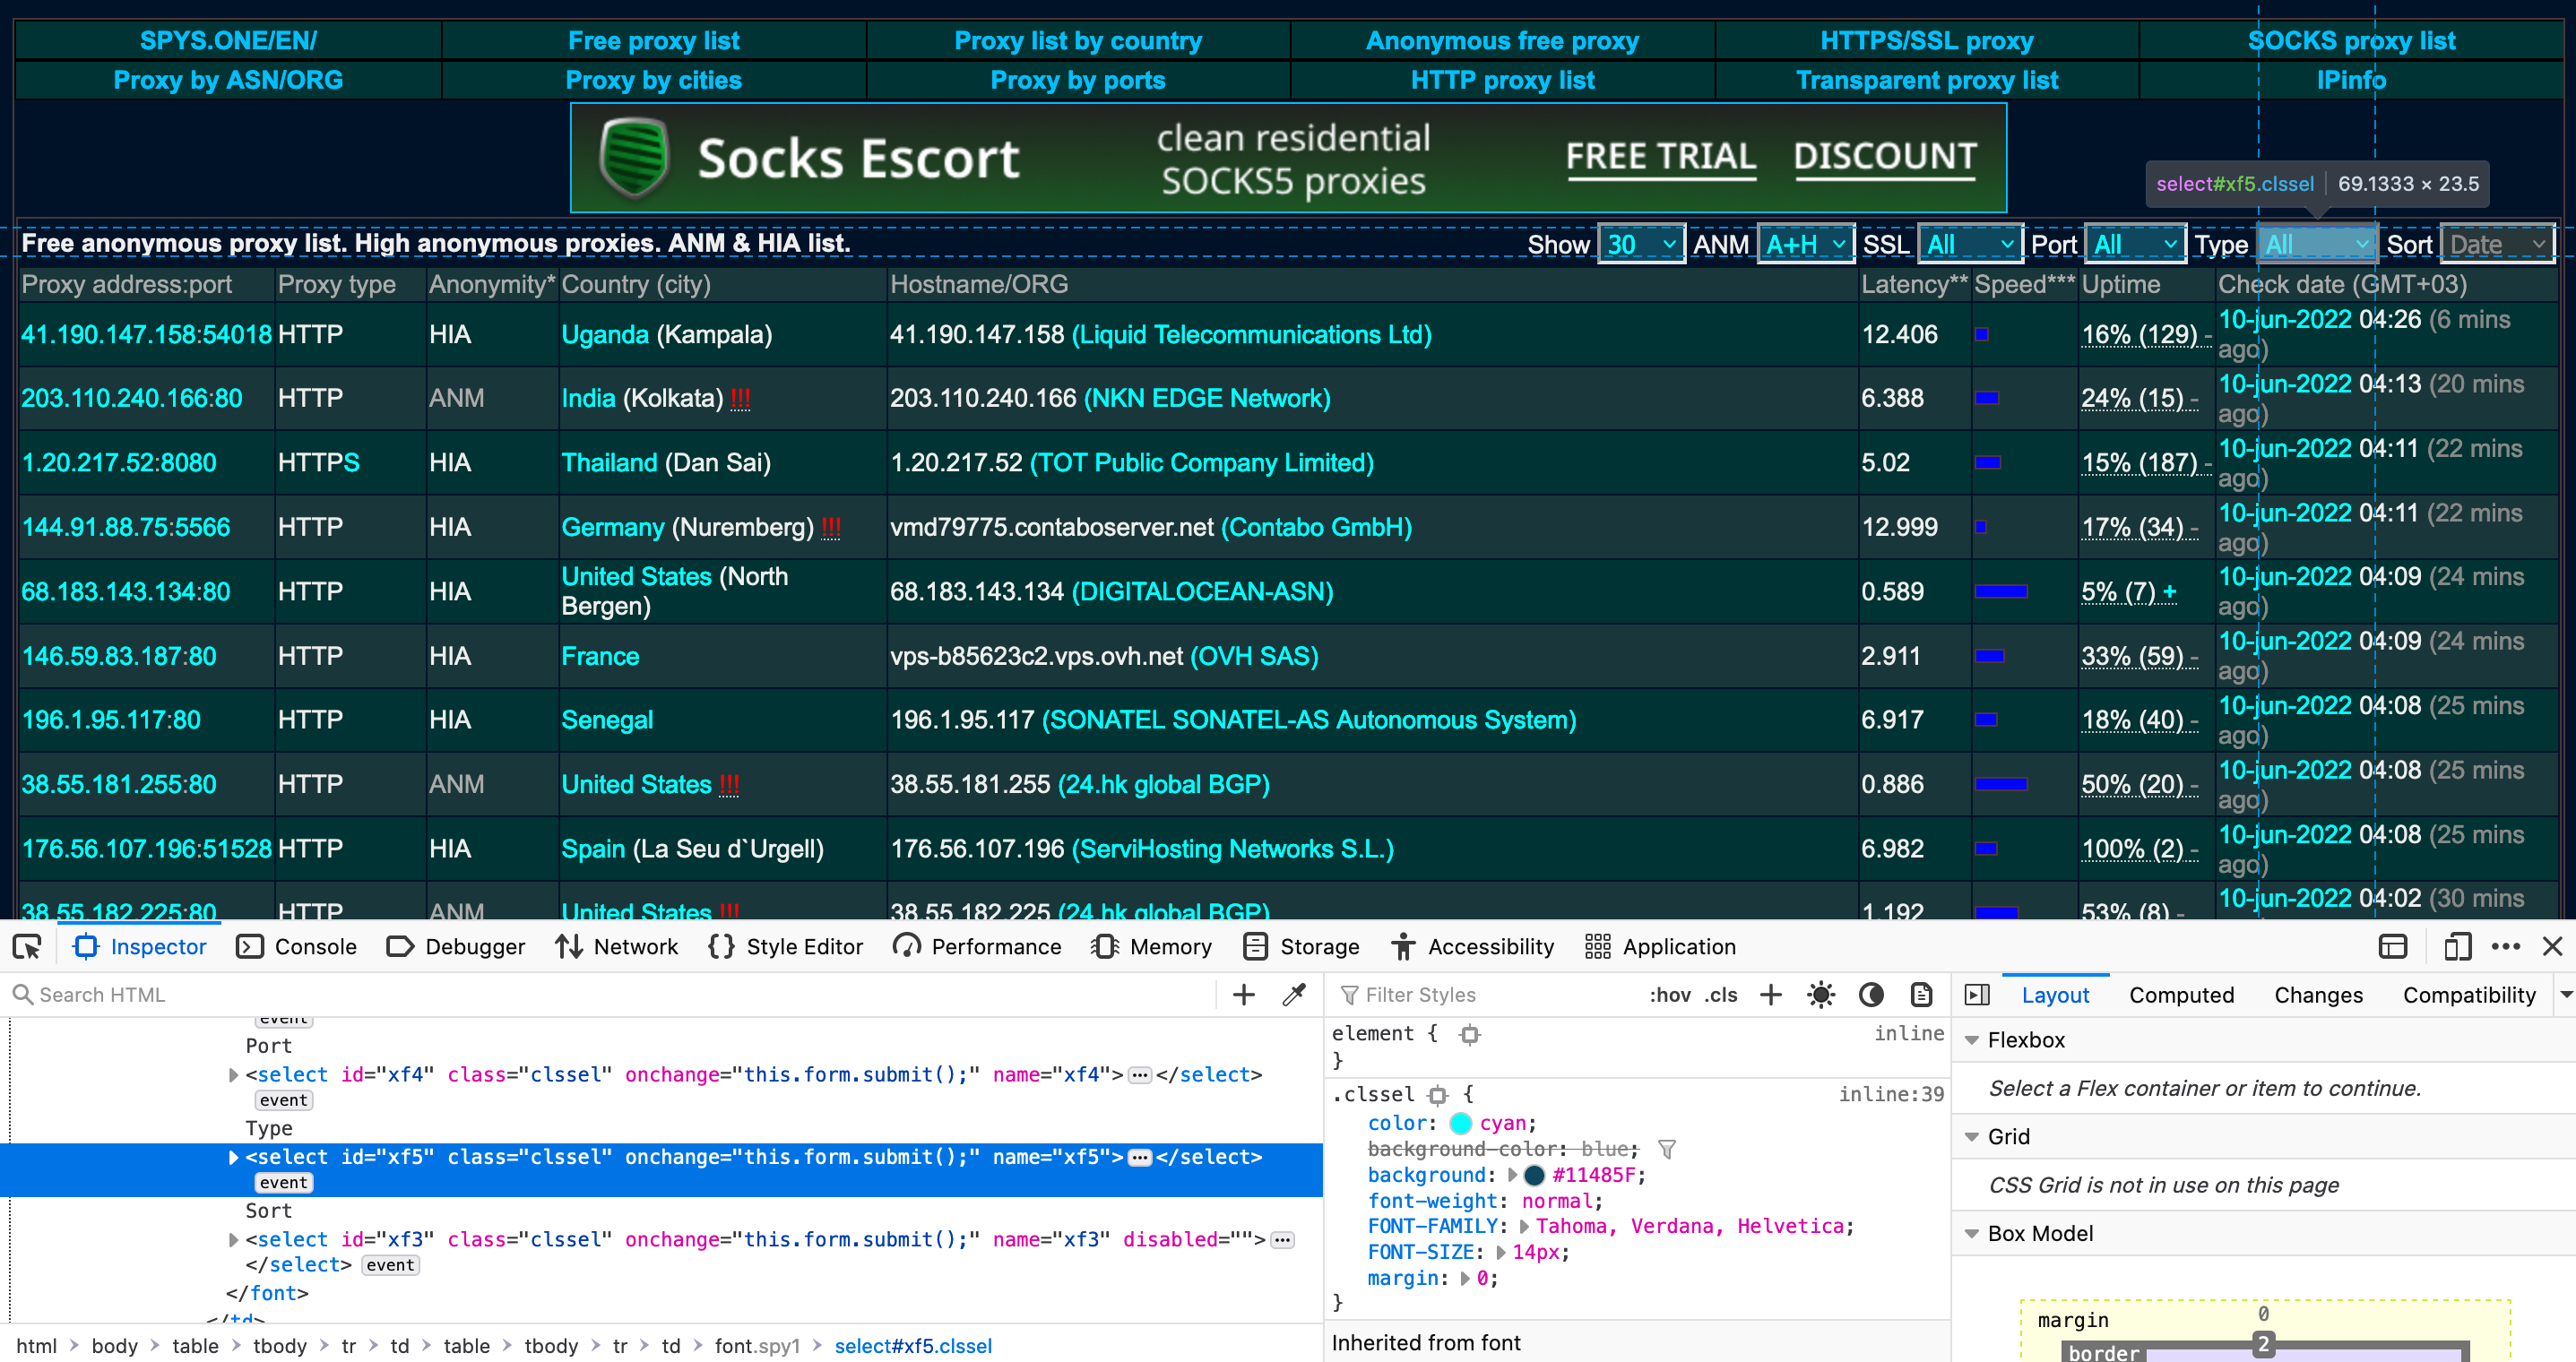

We'll use the `driver.find_element()` function to select the dropdown menus by `id`, and use these to create a `Select` object. Then we can use the `driver.select_by_visible_text()` function to select our desired options. After each selection, we'll insert a `sleep` of 5 seconds to give the page time to update.

In [ ]:
def scrape_proxies():

    # ...
    
    # Select option from dropdown menu for "Show"
    select_show = Select(driver.find_element(By.ID, "xpp"))
    select_show.select_by_visible_text("500")
    time.sleep(5)

    # Select option from dropdown menu for "Type"
    select_type = Select(driver.find_element(By.ID, "xf5"))
    select_type.select_by_visible_text("HTTP")
    time.sleep(5)
    
    # ...

Now let's inspect the elements that contain the data we need. We only need the first two columns of the table, which display the proxy address and proxy type. So, for each row of the `<table>`, we will only select the first two `td` elements.

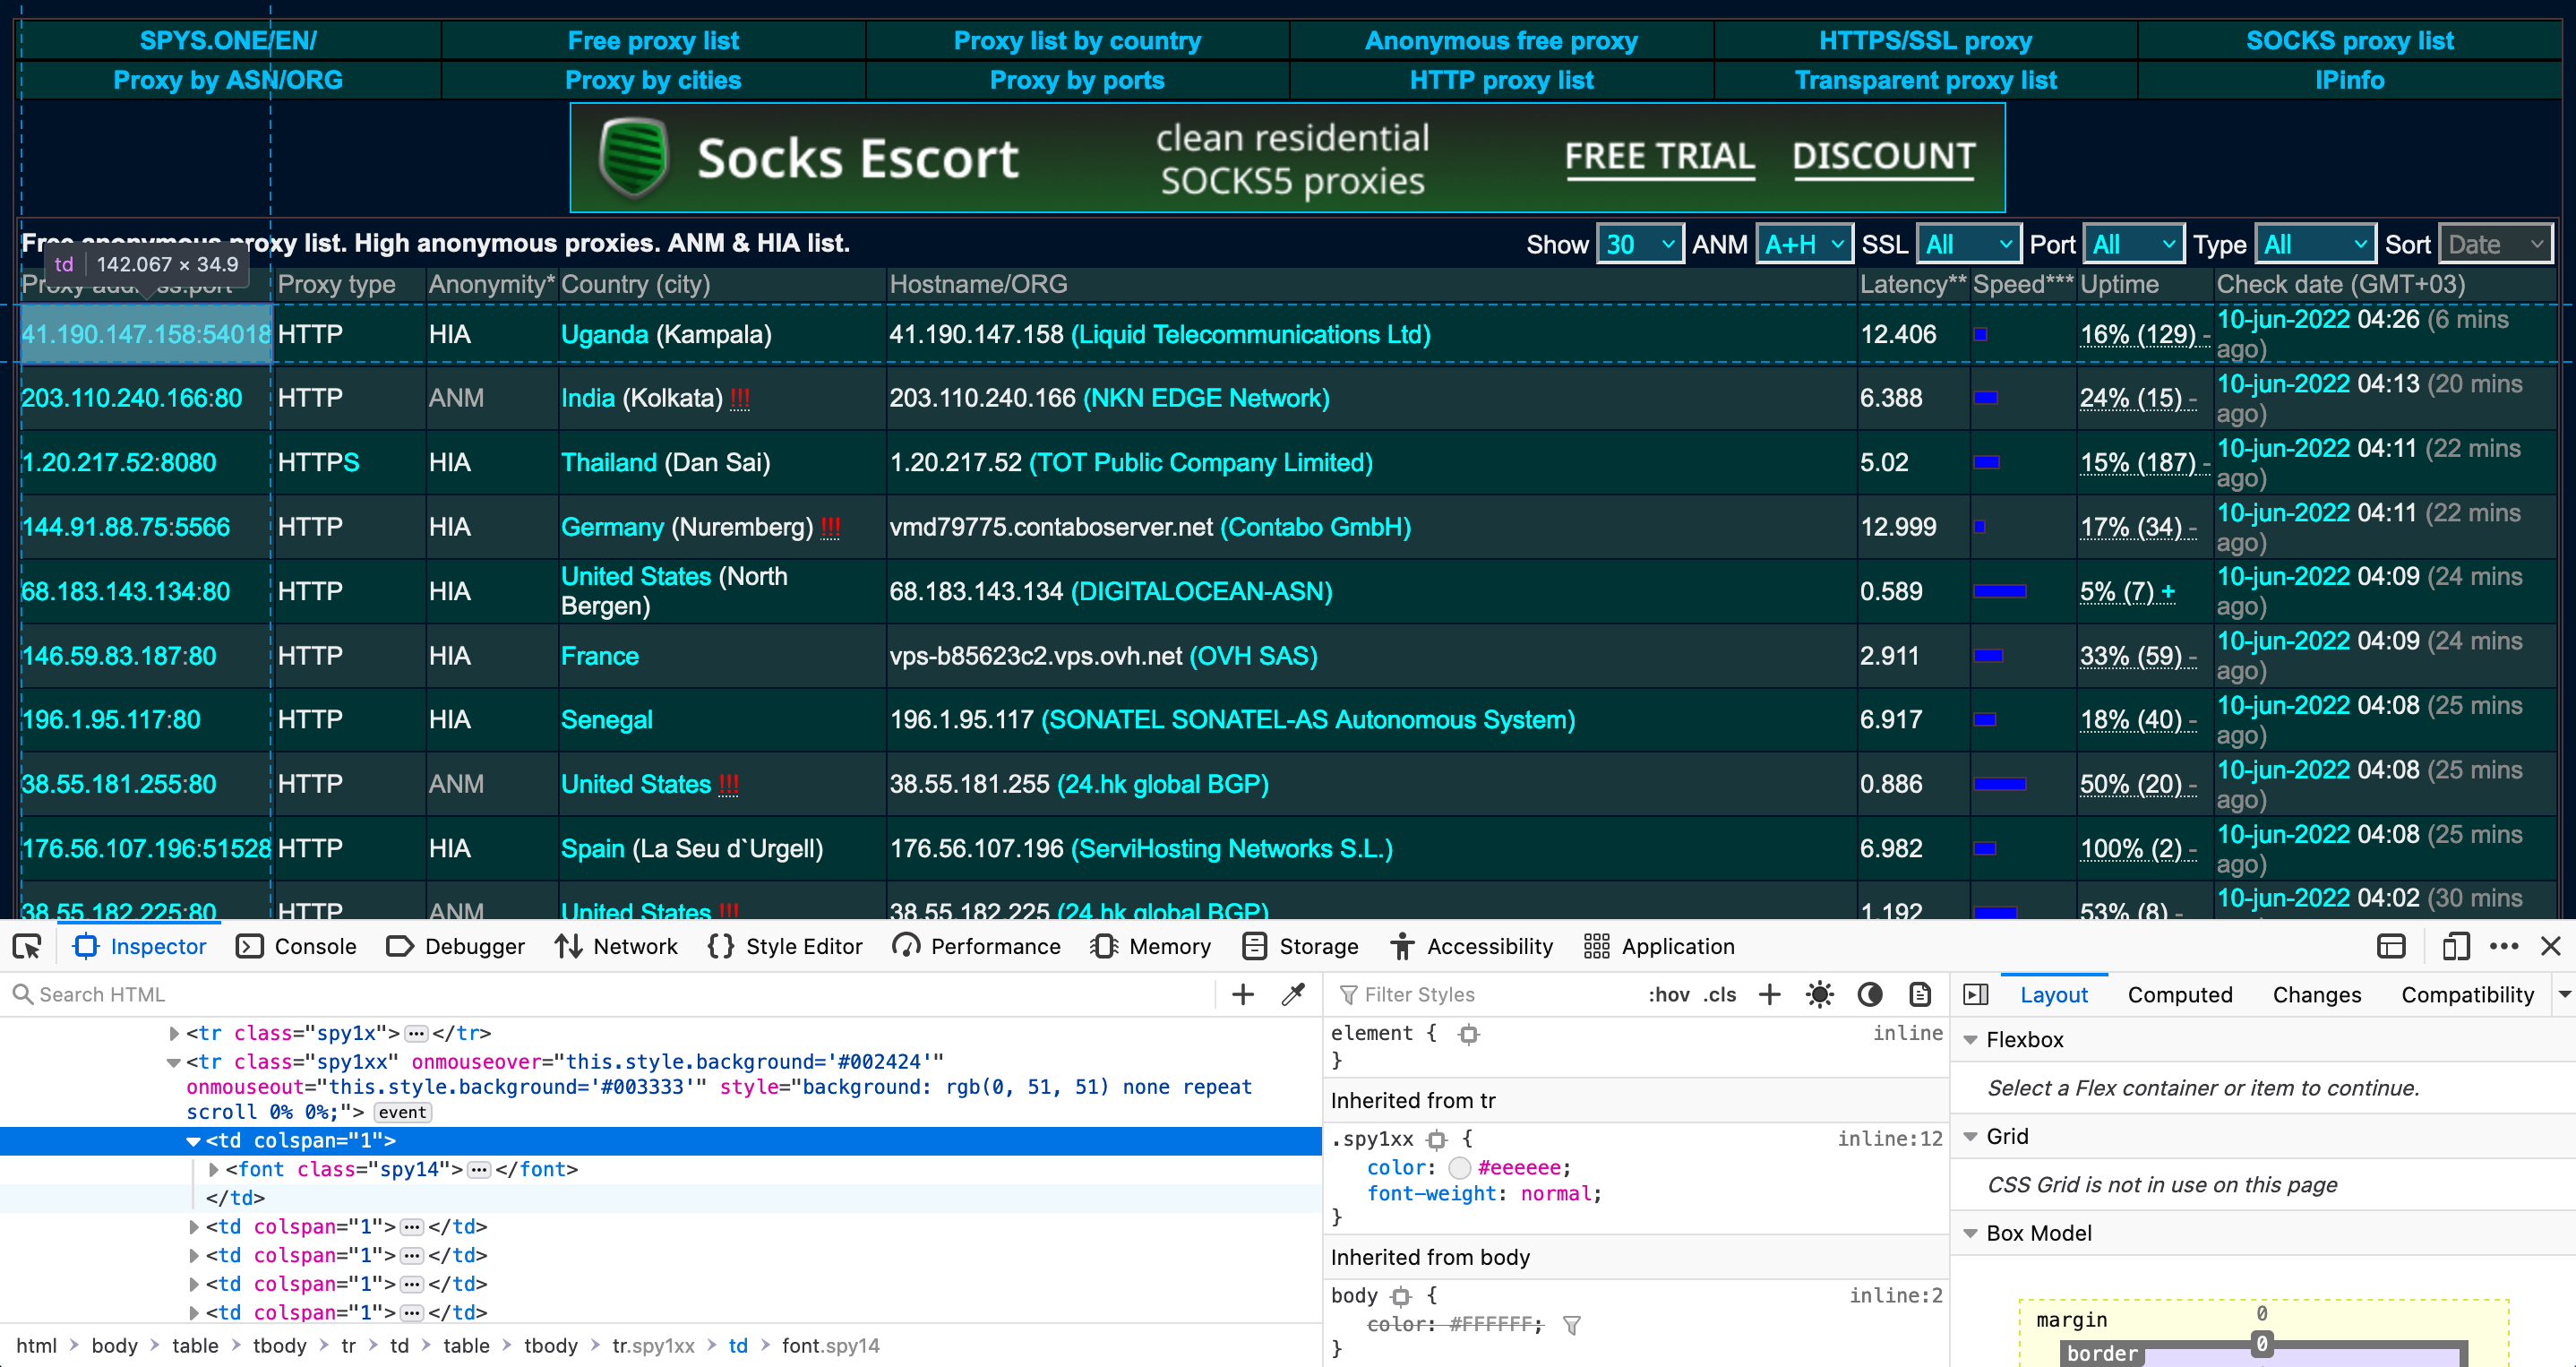

We'll use the `driver.find_elements()` function to get all the `tr` elements in the HTML and store them in a list called `rows`. There are extra rows that don't list any proxy information, so we'll remove these from the list. Based on inspecting the rows that are retrieved, the rows we need are every other row from indexes `9` to `len(rows)-4`. We will use Python's slicing feature to filter out the unnecessary rows.

In [ ]:
def scrape_proxies():

    # ...
    
    # Get rows
    rows = driver.find_elements(By.TAG_NAME, "tr")
    # Filter out unnecessary rows
    rows = rows[9:len(rows)-4:2]
    
    # ...

Let's create a new list called `ip_addresses`. Now we can loop through all the rows and retrieve the td elements that we need. The proxy address and port are listed in the first column. We also need to check whether the proxy is of type HTTP or HTTPs. On each iteration, we'll instantiate a new dictionary that stores these two pieces of data and append the dictionary to `ip_addresses`. This will allow us to save the proxy information to a Pandas DataFrame later on.

In [ ]:
def scrape_proxies():

    # ...
    
    # Loop through rows
    ip_addresses = []
    for row in rows:
        # Get td elements
        columns = row.find_elements(By.TAG_NAME, "td")
        # Store data in dictionary
        data = {"Proxy address":"", "Proxy type":""}
        # Check if HTTP or HTTPS
        if "HTTPS" in columns[1].text.strip():
            data["Proxy address"] = columns[0].text.strip()
            data["Proxy type"] = "https"
        else:
            data["Proxy address"] = columns[0].text.strip()
            data["Proxy type"] = "http"
        # Append data to list
        ip_addresses.append(data)
        
    # ...

Next, we need to quit the `driver` and save the list of proxies to a Pandas DataFrame. Finally, we'll output the DataFrame to a CSV file, so that our list of proxies will be available for us to use in other scraping programs.

In [ ]:
def scrape_proxies():

    # ...
    
    driver.quit()

    # Save to DataFrame
    df = pd.DataFrame(ip_addresses)
    # Output to CSV
    df.to_csv("spys-proxy-list-500.csv")
    
    # ...

Here is the full `scrape_proxies()` function.

In [5]:
def scrape_proxies():
    url = "https://spys.one/en/anonymous-proxy-list/"

    # Instantiate the driver
    driver = browser()
    driver.get(url)
    time.sleep(3)

    # Select option from dropdown menu for "Show"
    select_show = Select(driver.find_element(By.ID, "xpp"))
    select_show.select_by_visible_text("500")
    time.sleep(5)

    # Select option from dropdown menu for "Type"
    select_type = Select(driver.find_element(By.ID, "xf5"))
    select_type.select_by_visible_text("HTTP")
    time.sleep(5)
    
    # Get rows
    rows = driver.find_elements(By.TAG_NAME, "tr")
    # Filter out unnecessary rows
    rows = rows[9:len(rows)-4:2]

    # Loop through rows
    ip_addresses = []
    for row in rows:
        # Get td elements
        columns = row.find_elements(By.TAG_NAME, "td")
        # Store data in dictionary
        data = {"Proxy address":"", "Proxy type":""}
        # Check if HTTP or HTTPS
        if "HTTPS" in columns[1].text.strip():
            data["Proxy address"] = columns[0].text.strip()
            data["Proxy type"] = "https"
        else:
            data["Proxy address"] = columns[0].text.strip()
            data["Proxy type"] = "http"
        # Append data to list
        ip_addresses.append(data)
        
    driver.quit()

    # Save to DataFrame
    df = pd.DataFrame(ip_addresses)
    # Output to CSV
    df.to_csv("spys-proxy-list-500.csv", index=False)
    print("Scraping completed")

Now we can run our `scrape_proxies()` function to see it in action.

In [21]:
scrape_proxies()

Scraping completed


Sure enough, our output file was created. Let's load it into a DataFrame and print the first five rows to see if the data was scraped correctly.

In [23]:
df = pd.read_csv("spys-proxy-list-500.csv")
df.head()

Proxy address Proxy type
0  41.190.147.158:54018       http
1    203.110.240.166:80       http
2      1.20.217.52:8080      https
3     144.91.88.75:5566       http
4     68.183.143.134:80       http

Let's print the last five rows as well.

In [24]:
df.tail()

Proxy address Proxy type
495    203.154.71.139:80       http
496      206.81.0.107:80       http
497  66.196.238.178:3128       http
498    113.53.94.12:9812       http
499  41.60.232.131:34098       http

We can see that all 500 rows of data were successfully extracted and saved to the CSV file. Let's write a quick function to randomly select one of these proxies to use for scraping using the `randint` function. Then, we'll format this as the required dictionary which can be used with the Requests library.

In [6]:
import random

def get_random_proxy():
    # Load the list of proxies into DataFrame
    df = pd.read_csv("spys-proxy-list-500.csv")
    # Select random index
    proxy_index = random.randint(0, len(df) - 1)
    selected_proxy = df.loc[proxy_index, "Proxy address"]
    # Format proxy
    proxy = {"http": "http://" + selected_proxy, "https": "https://" + selected_proxy}
    return proxy

print(get_random_proxy())

{'http': 'http://72.47.152.224:55443', 'https': 'https://72.47.152.224:55443'}


Let's write another function to quickly test our randomly selected proxy. We can submit a GET request to the website [icanhazip](http://icanhazip.com) for this purpose. Printing the content of the resulting response should display the proxy IP address.

In [12]:
import requests

def test_proxy():
    # Get random user agent
    ua = UserAgent()
    user_agent = ua.random
    headers = {"User-Agent":user_agent}
    # Get random proxy
    proxy = get_random_proxy()
    print(proxy)
    # Test proxy
    r = requests.get("http://icanhazip.com", headers=headers, proxies=proxy)
    return r.content

print(test_proxy())

{'http': 'http://200.105.215.18:33630', 'https': 'https://200.105.215.18:33630'}
b'200.105.215.18\n'


The randomly selected proxy address matches the output of the call to the `requests.get()` function, so our test was successful.